In [167]:
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
from keras.optimizers import SGD, RMSprop
from scipy.misc import imresize
from keras import backend as K
K.set_image_dim_ordering('th')
K.image_dim_ordering()

'th'

In [5]:
def reducex(X, y, reduce_classes=None, reduce_percent=.2):
#     import pdb; pdb.set_trace()
    idxs = []
    if reduce_classes:
        for c in reduce_classes:
            try:
                idxs += list(np.where(y == c)[0])
            except IndexError:
                continue
    np.random.seed(1000)
    new_size = int(np.round(len(idxs) * reduce_percent))
    np.random.shuffle(idxs)
    return (X[idxs[:int(len(idxs)*reduce_percent)]], y[idxs[:int(len(idxs)*reduce_percent)]] == 3)

batch_size = 16

In [181]:
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

Xtrain, ytrain = reducex(Xtrain, ytrain, reduce_classes=[3,5], reduce_percent=0.3)
Xtest, ytest = reducex(Xtest, ytest, reduce_classes=[3,5], reduce_percent=0.3)

yetrain = keras.utils.to_categorical(ytrain)
yetest = keras.utils.to_categorical(ytest)

In [187]:
######## Resize cifar10 images to 3x48x48 #############
rsize = 224
temp = np.zeros((Xtrain.shape[0], 3, rsize, rsize))

for i, row in enumerate(Xtrain):
    temp[i] = imresize(row, size=(48,48)).transpose(2,1,0)

temp2 = np.zeros((Xtrain.shape[0], 3, 48, 48))
for i in Xtest:
    temp2[i] = imresize(row, size=(48,48)).transpose(2,1,0)

Xtrain = temp
Xtest = temp2

MemoryError: 

0 1
1 0
1 1
[ True]


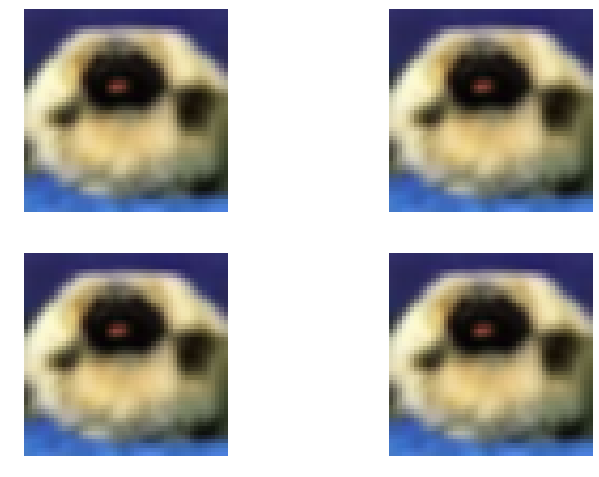

In [62]:
# img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = Xtrain[8]
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
j = 0
xims = []
fig, axes = plt.subplots(2,2,figsize=(12,8))
for batch in datagen.flow(x, batch_size=1):
    axes[j][i].set_axis_off()
    axes[j][i].imshow(batch.reshape(x.shape[1:]).transpose(2,1,0), interpolation='nearest')
    if i >= 1:
        j += 1
        i = -1
    if j == 2:
        break
    i +=1 
    print j,i
    
# plt.imshow(Xtrain[0].reshape(32,32,3))
# fig, axes1 = plt.subplots(2,2,figsize=(12,8))
# for j in range(5):
#     for k in range(5):
#         i = np.random.choice(range(len(X)))
#         axes1[j][k].set_axis_off()
#         axes1[j][k].imshow(X[i:i+1][0], interpolation='nearest')
print ytrain[8]

In [188]:
??VGG16

In [61]:
# set(list(ytrain.reshape(-1)))
# keras.utils.to_categorical(list(ytrain.reshape(-1)))
t = imresize(Xtrain[0], size=(48,48)).transpose(2,1,0)
t.shape, Xtrain[0].shape

((3L, 48L, 48L), (3L, 32L, 32L))

In [97]:
train_generator = datagen.flow(Xtrain,yetrain,
        batch_size=batch_size)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow(Xtest, yetest,
        batch_size=batch_size)

In [98]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 13, 13)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 13, 13)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 6, 6)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 4, 4)          18496     
__________

In [99]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [100]:
batch_size = 64
model.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=300 // batch_size)
import datetime
now = str(datetime.datetime.now())


Epoch 1/15
7/7 [==============================] - 2s - loss: 4.0395 - acc: 0.5257 - val_loss: 0.6932 - val_acc: 0.5117
Epoch 2/15
7/7 [==============================] - 1s - loss: 0.7200 - acc: 0.4900 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 3/15
7/7 [==============================] - 1s - loss: 0.6975 - acc: 0.4944 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/15
7/7 [==============================] - 1s - loss: 0.6943 - acc: 0.4989 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 5/15
7/7 [==============================] - 1s - loss: 0.6959 - acc: 0.5033 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/15
7/7 [==============================] - 1s - loss: 0.6933 - acc: 0.5045 - val_loss: 0.6934 - val_acc: 0.4745
Epoch 7/15
7/7 [==============================] - 2s - loss: 0.7386 - acc: 0.5206 - val_loss: 0.6929 - val_acc: 0.5234
Epoch 8/15
7/7 [==============================] - 1s - loss: 0.6934 - acc: 0.5212 - val_loss: 0.6929 - val_acc: 0.5185
Epoch 9/15
7/7 [==============================] 

In [126]:
# model.save_weights('first_try.h5')  # always save your weights after training or during training
weights = model.weights[6:]
weights[0].eval().shape

(256L, 32L)

#### Using VGG16 Bottleneck Features

In [1]:
from keras.applications import VGG16

In [159]:
vmodel = VGG16(include_top=True, weights='imagenet')#, input_shape=(3,48,48))

In [164]:
vmodel.layers.pop()
for layr in vmodel.layers:
    layr.trainable = False
last = vmodel.output
# x = Flatten(last)
x = Dense(2, activation='sigmoid')(last)
vvmodel = keras.models.Model(vmodel.input, x)

In [166]:
# vmodel.add(Dense(2))
# vmodel.add(Activation('sigmoid'))
vvmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
__________

In [183]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(Xtrain,
        batch_size=batch_size, shuffle=True)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow(Xtest,
        batch_size=batch_size, shuffle=True)



In [172]:
# train_batches = train_generator.flow(Xtrain, yetrain, batch_size=batch_size, shuffle=True)
# val_batches = test_datagen.flow(Xtest, yetest, batch_size=batch_size, shuffle=False)

AttributeError: 'NumpyArrayIterator' object has no attribute 'flow'

In [179]:
opt = RMSprop(lr=0.01)
vvmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [176]:
def fit_model(model, batches, val_batches, epochs=1):
    model.fit_generator(batches, steps_per_epoch=1500 // batch_size, epochs=epochs, 
                        validation_steps=700 // batch_size,
                        validation_data=val_batches)

In [186]:
vvmodel.fit(Xtrain[0:100], yetrain[0:100], verbose=True)

ValueError: Error when checking model input: expected input_17 to have shape (None, 3, 224, 224) but got array with shape (100L, 3L, 48L, 48L)

In [184]:
fit_model(vvmodel, train_generator, validation_generator, epochs=2)

# model.fit_generator(
#         train_generator,
#         steps_per_epoch=500 // batch_size,
#         epochs=15,
#         validation_data=validation_generator,
#         validation_steps=300 // batch_size)

Epoch 1/2


ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: [[[[   7.    9.   10. ...,  132.  130.  130.]
   [   7.    9.    9. ...,  130.  114.  114.]
   [   7.    7.    9. ...,  114.   95.   95.]
   ..., 
   [ 228.  237.  237. ...,    0.   25.   25.]
   [ 237.  243.  243. ...,   23.   48.   50.]
   [ 243.  243.  236. ...,   46.   46.   48.]]

  [[   5.    7.    8. ...,  127.  124.  124.]
   [   5.    7.    7. ...,  124.  111.  111.]
   [   5.    5.    7. ...,  111.   92.   92.]
   ..., 
   [ 218.  230.  230. ...,    0.   26.   26.]
   [ 230.  239.  239. ...,   24.   49.   50.]
   [ 239.  239.  231. ...,   47.   47.   49.]]

  [[   6.    8.    9. ...,   91.   90.   90.]
   [   6.    8.    8. ...,   90.   77.   77.]
   [   6.    6.    8. ...,   77.   60.   60.]
   ..., 
   [ 192.  207.  207. ...,    0.   18.   18.]
   [ 207.  217.  217. ...,   17.   34.   35.]
   [ 217.  217.  206. ...,   33.   33.   34.]]]


 [[[  15.   15.   15. ...,   63.  117.  146.]
   [  15.   15.   15. ...,  120.  156.  171.]
   [  15.   15.   15. ...,  127.  148.  159.]
   ..., 
   [ 176.  176.  176. ...,  116.  119.  121.]
   [ 176.  176.  176. ...,   89.   96.  121.]
   [ 176.  176.  176. ...,   66.   76.  101.]]

  [[  18.   23.   23. ...,   90.  150.  182.]
   [  18.   18.   18. ...,  130.  168.  183.]
   [  15.   15.   15. ...,  113.  127.  135.]
   ..., 
   [  85.   85.   85. ...,   45.   45.   46.]
   [  85.   85.   85. ...,   28.   30.   46.]
   [  85.   85.   85. ...,   14.   19.   32.]]

  [[   7.   16.   16. ...,   83.  143.  176.]
   [   7.    7.    7. ...,  123.  159.  174.]
   [   5.    5.    5. ...,   98.  111.  117.]
   ..., 
   [  38.   38.   38. ...,   21.   21.   21.]
   [  38.   38.   38. ...,   14.   15.   21.]
   [  38.   38.   38. ...,    8.   11.   15.]]]


 [[[ 189.  189.  188. ...,  211.  211.  213.]
   [ 188.  188.  189. ...,  213.  213.  215.]
   [ 187.  188.  193. ...,  213.  215.  216.]
   ..., 
   [ 170.  170.  167. ...,  193.  195.  197.]
   [ 167.  167.  145. ...,  193.  193.  195.]
   [ 167.  145.  121. ...,  190.  193.  195.]]

  [[ 190.  190.  189. ...,  210.  210.  212.]
   [ 190.  190.  191. ...,  212.  212.  214.]
   [ 189.  190.  196. ...,  212.  214.  215.]
   ..., 
   [ 182.  182.  179. ...,  193.  194.  196.]
   [ 179.  179.  156. ...,  193.  193.  194.]
   [ 179.  156.  133. ...,  190.  193.  194.]]

  [[ 194.  194.  194. ...,  215.  215.  217.]
   [ 193.  193.  196. ...,  217.  217.  219.]
   [ 193.  194.  202. ...,  217.  219.  221.]
   ..., 
   [ 189.  189.  187. ...,  200.  202.  204.]
   [ 187.  187.  162. ...,  200.  200.  202.]
   [ 187.  162.  138. ...,  197.  200.  202.]]]


 ..., 
 [[[  58.   96.  111. ...,  180.  180.  188.]
   [  58.   96.  111. ...,  180.  188.  190.]
   [  34.   58.   96. ...,  188.  190.  190.]
   ..., 
   [   7.    1.    1. ...,   72.   69.   62.]
   [   1.    1.    1. ...,   73.   72.   69.]
   [   1.    1.    2. ...,   73.   72.   69.]]

  [[  58.   97.  114. ...,  155.  155.  159.]
   [  58.   97.  114. ...,  155.  159.  156.]
   [  33.   58.   97. ...,  159.  156.  156.]
   ..., 
   [   8.    2.    2. ...,   68.   64.   57.]
   [   2.    2.    0. ...,   70.   68.   64.]
   [   0.    0.    1. ...,   70.   68.   64.]]

  [[  64.  105.  123. ...,  132.  132.  134.]
   [  64.  105.  123. ...,  132.  134.  132.]
   [  37.   64.  105. ...,  134.  132.  132.]
   ..., 
   [   8.    2.    2. ...,   72.   68.   59.]
   [   2.    2.    0. ...,   74.   72.   68.]
   [   0.    0.    0. ...,   74.   72.   68.]]]


 [[[ 241.  241.  226. ...,  217.  217.  217.]
   [ 234.  234.  215. ...,  192.  192.  217.]
   [ 236.  236.  192. ...,  166.  166.  192.]
   ..., 
   [  78.   79.   79. ...,  123.  124.  124.]
   [  79.   79.   79. ...,  126.  123.  123.]
   [  79.   79.   79. ...,  130.  126.  126.]]

  [[  75.   75.   76. ...,  194.  194.  194.]
   [  61.   61.   62. ...,  158.  158.  194.]
   [  75.   75.   65. ...,  127.  127.  158.]
   ..., 
   [  55.   55.   56. ...,   94.   96.   96.]
   [  55.   55.   56. ...,   97.   94.   94.]
   [  55.   55.   56. ...,  100.   97.   97.]]

  [[  79.   79.   83. ...,  191.  191.  191.]
   [  59.   59.   65. ...,  156.  156.  191.]
   [  69.   69.   72. ...,  125.  125.  156.]
   ..., 
   [  55.   55.   53. ...,  104.  106.  106.]
   [  55.   53.   53. ...,  108.  104.  104.]
   [  55.   53.   53. ...,  112.  108.  108.]]]


 [[[ 175.  173.  171. ...,   87.   92.  100.]
   [ 176.  175.  173. ...,   87.   92.  100.]
   [ 187.  176.  175. ...,   92.  100.  112.]
   ..., 
   [ 191.  186.  184. ...,  143.  143.  150.]
   [ 186.  184.  184. ...,  144.  144.  143.]
   [ 186.  184.  184. ...,  147.  147.  144.]]

  [[ 166.  163.  161. ...,   61.   65.   72.]
   [ 168.  166.  163. ...,   61.   65.   72.]
   [ 179.  168.  166. ...,   65.   72.   83.]
   ..., 
   [ 185.  180.  177. ...,  130.  130.  136.]
   [ 180.  177.  177. ...,  130.  130.  130.]
   [ 180.  177.  174. ...,  133.  133.  130.]]

  [[ 152.  147.  143. ...,   45.   48.   53.]
   [ 154.  152.  147. ...,   45.   48.   53.]
   [ 167.  154.  152. ...,   48.   53.   62.]
   ..., 
   [ 171.  165.  160. ...,  108.  108.  114.]
   [ 165.  160.  160. ...,  105.  105.  108.]
   [ 165.  160.  158. ...,  106.  106.  105.]]]]

In [ ]:
bottleneck_features_train = vmodel.predict_generator(
        train_generator, 500)
np.save(open('bottleneck_features_train.npy', 'w'),
            bottleneck_features_train)

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=(256,32),weights=np.zeros((256,32))))
top_model.add(Dense(32))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2))
top_model.add(Activation('sigmoid'))


In [138]:
# top_model.set_weights(weights)
top_model.layers[0].set_weights(weights[0].eval())

In [ ]:
top_model_weights_path = 'first_try.h5'
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
vmodel.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
vmodel.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1. / 255)

# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary')

# fine-tune the model


In [ ]:
epochs = 25
vmodel.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)